In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path # path lib allows us to work with system files directories, The Path class represents a filesystem path and offers various methods for interacting with files, directories, and paths. It simplifies common tasks like creating, deleting, renaming, and checking the existence of files and directories.
from PIL import Image # The statement from PIL import Image is used to import the Image module from the Python Imaging Library (PIL) in Python. PIL is a powerful image processing library that provides a wide range of functionalities for working with images, including loading, saving, manipulating, and displaying image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model

In [4]:
path=Path("C:\\Users\\mahen\\Downloads\\UTKFace")
filenames=list(map(lambda x: x.name,path.glob('*.jpg')))


The code filenames=list(map(lambda x: x.name,path.glob('*.jpg'))) is used to create a list of filenames for all JPEG images in a specified directory. It utilizes the map() function and a lambda expression to extract filenames from a list of file objects.

**path.glob('*.jpg'):** This part of the code uses the glob() function from the pathlib module to find all files with the .jpg extension in the specified directory. The '*.jpg' pattern indicates that it should match any filename ending with .jpg.

**lambda x: x.name:** This is a lambda expression, an anonymous function that takes a single argument x and returns its name attribute. In this context, x represents a file object returned by path.glob().

**map(lambda x: x.name, path.glob('*.jpg')):** The map() function applies the lambda expression to each element of the list returned by path.glob(). It effectively extracts the name attribute from each file object, resulting in a list of filenames.

**filenames=list(...):** The entire expression is wrapped in list() to convert the result of the map() operation into a list. This list is assigned to the variable filenames, which now contains a list of filenames for all JPEG images in the specified directory.



In [5]:
print(len(filenames))
print(filenames[:3])

23708
['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg']


### Data preprocessing
Data I have downloaded is composed of 23,708 images with age and gender in the Image Name. For Example, 1_0_0239389.JPG image means that age is 1, gender is 0 (male) and 0 refers to the race (not needed in this task). So I split the image name on ' ' so I can get separated age and gender with image. Also, I have shuffle all the images

In [6]:
np.random.seed(10) # Setting a seed ensures that the sequence of random numbers generated will be the same every time the code is executed.
np.random.shuffle(filenames)

age_labels, gender_labels, image_path = [], [], []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])
    gender_labels.append(temp[1])
    
print(age_labels[0:4])
print(gender_labels[0:4])

['23', '28', '26', '37']
['1', '0', '1', '0']


In [7]:
print(image_path[0:2])

['23_1_2_20170116172910708.jpg.chip.jpg', '28_0_1_20170113150719161.jpg.chip.jpg']


### From Unstructured data to Structured data

In [8]:
df=pd.DataFrame()
df['image'],df['age'],df['gender']=image_path,age_labels,gender_labels

In [9]:
df.head()

,image,age,gender
0,23_1_2_20170116172910708.jpg.chip.jpg,23,1
1,28_0_1_20170113150719161.jpg.chip.jpg,28,0
2,26_1_0_20170116234741431.jpg.chip.jpg,26,1
3,37_0_3_20170119202516470.jpg.chip.jpg,37,0
4,60_0_0_20170109013457906.jpg.chip.jpg,60,0


In [10]:
gender_dict={0:'Male',1:'Female'}

In [11]:
df=df.astype({'age':'float32','gender':'int32'})

#### Reason for converting
Age is a continuous variable that can take on fractional values, such as 25.5 or 32.7. Representing age as a float32 allows for more precise representation of these fractional values.

Gender is typically represented as a categorical variable with a limited number of distinct values, such as 0 for male and 1 for female. Representing gender as an int32 is efficient for storing and processing this type of data.


Type conversions ensure that the data is represented in a format that is both accurate and compatible with the deep learning model's expectations.

In [12]:
df

,image,age,gender
0,23_1_2_20170116172910708.jpg.chip.jpg,23.0,1
1,28_0_1_20170113150719161.jpg.chip.jpg,28.0,0
2,26_1_0_20170116234741431.jpg.chip.jpg,26.0,1
3,37_0_3_20170119202516470.jpg.chip.jpg,37.0,0
4,60_0_0_20170109013457906.jpg.chip.jpg,60.0,0
...,...,...,...
23703,28_1_3_20170104231422265.jpg.chip.jpg,28.0,1
23704,26_1_1_20170117183713316.jpg.chip.jpg,26.0,1
23705,4_1_0_20170109193342601.jpg.chip.jpg,4.0,1
23706,26_1_1_20170117200205236.jpg.chip.jpg,26.0,1


In [13]:
print(df.dtypes)

image      object
age       float32
gender      int32
dtype: object


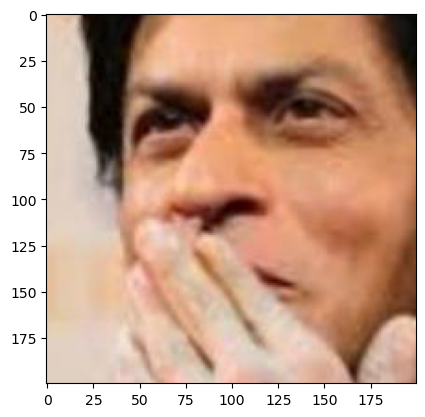

In [14]:
img=Image.open("C:\\Users\\mahen\\Downloads\\UTKFace/"+df.image[3])# opening the image no 3 which the all the images are stored in the image varaible
plt.imshow(img)

C:\Users\mahen\AppData\Local\Temp\ipykernel_12992\2409177837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

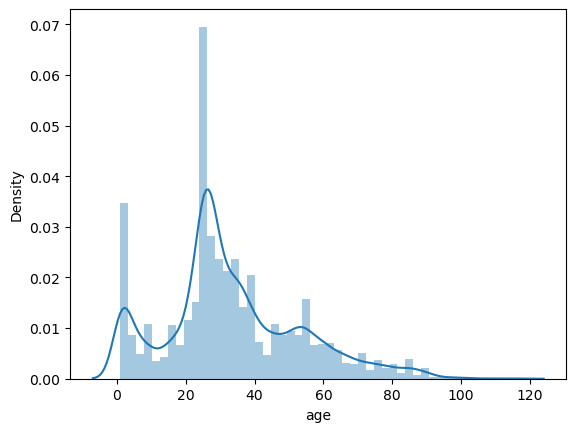

In [15]:
sns.distplot(df.age)

#### observation 
- Mostly there are 20-40 age group do present

### Plotting images

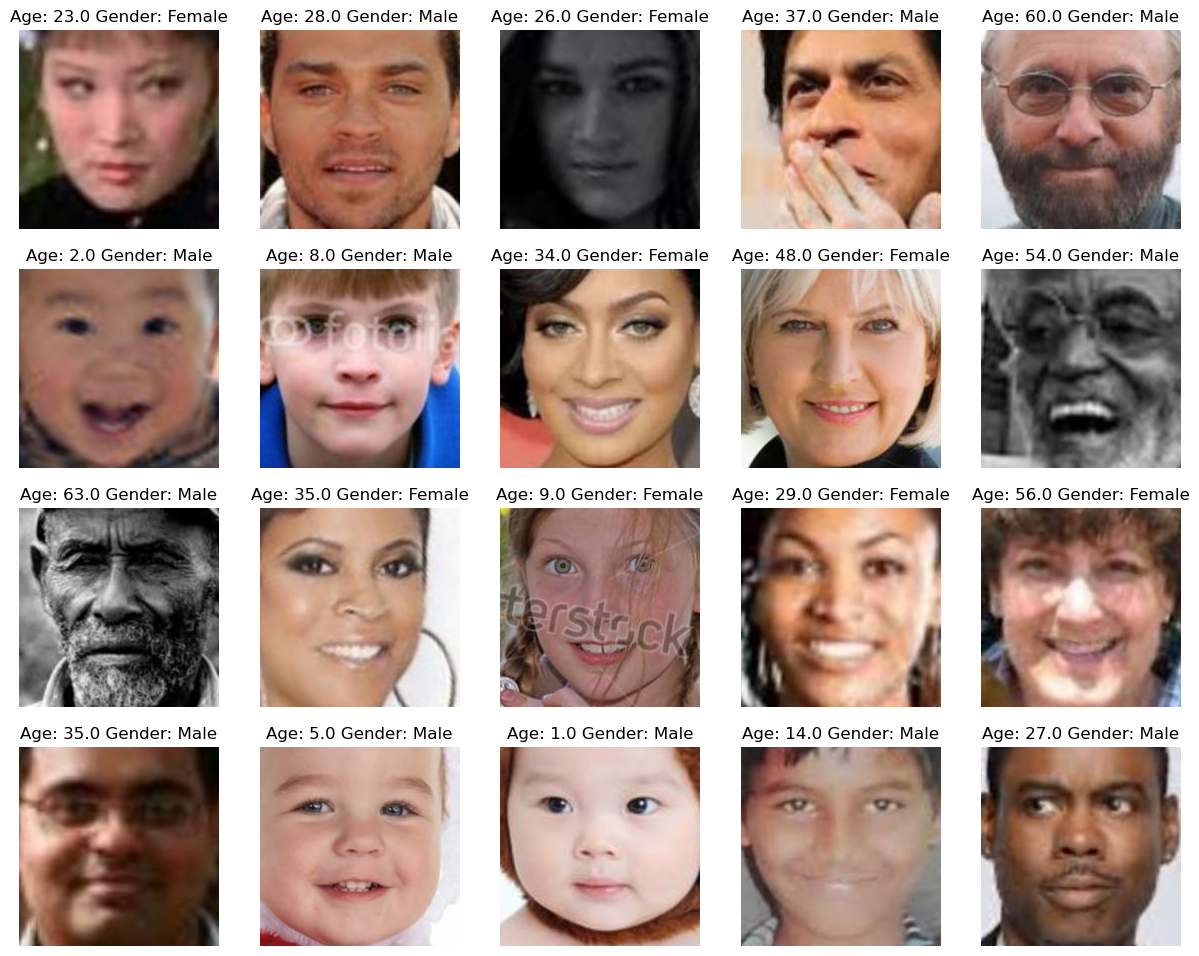

In [16]:
files = df.iloc[0:20] # This line selects the first 20 rows of the DataFrame df and assigns them to the variable files. This creates a subset of the data containing the information for the first 20 images.
plt.figure(figsize=(15,15)) # This line starts a for loop that iterates over the rows of the files DataFrame using the itertuples() method. Each iteration assigns the index, filename, age, and gender values to the respective variables.
for index, file, age, gender in files.itertuples():
    plt.subplot(5,5, index+1) # This line creates a subplot within the figure, arranging the subplots in a 5x5 grid. The index+1 parameter determines the position of the current subplot.
    img = load_img("C:\\Users\\mahen\\Downloads\\UTKFace/"+file) # This line loads the image corresponding to the current filename using the load_img() function. It concatenates the file path with the filename to create the full path.
    img = np.array(img) # This line converts the loaded image from the load_img() function into a NumPy array, which is a format suitable for processing and displaying with Matplotlib.
    plt.imshow(img) # This line displays the image represented by the NumPy array img using the imshow() function.
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}") #This line sets the title for the current subplot, displaying the age and gender information for the current image. The f-string formatting allows for dynamic insertion of variables.
    plt.axis('off')  # This line turns off the axis labels and ticks for the current subplot, removing unnecessary clutter from the image display.
                 
   

### why we are concatenating file with image path
The concatenation of the file variable with the image path is necessary to construct the full path to the image file. The file variable contains only the filename of the image, while the image path provides the base directory where the images are stored.

By concatenating the filename with the image path, you create a complete path that points to the specific image file on the system. This complete path is required by the load_img() function to locate and load the corresponding image.

For instance, if the file variable contains the value "image1.jpg" and the image path is "C:\\Users\\mahen\\Downloads\\UTKFace/", then concatenating them results in "C:\\Users\\mahen\\Downloads\\UTKFace/image1.jpg", which is the full path to the image file.

Since dataset is too large, It is taking a lot of time to train the model so I am splitting the data and only using half of the dataset. I have already shuffled all the data to ensure no biasness in the dataset.

In [17]:
train,test=train_test_split(df,test_size=0.85,random_state=42)


In [18]:
train.head()

,image,age,gender
18199,78_1_1_20170113011857601.jpg.chip.jpg,78.0,1
19557,24_0_2_20170103223924087.jpg.chip.jpg,24.0,0
20132,34_1_3_20170119152405425.jpg.chip.jpg,34.0,1
11849,46_0_3_20170119183135878.jpg.chip.jpg,46.0,0
2100,30_0_2_20170116174814595.jpg.chip.jpg,30.0,0


### Extracting Features

In [19]:
# converting Image to numpy array(extracting feature)
x_train = [] # This line initializes an empty list named x_train. This list will be used to store the processed image data.
for file in train.image: # This line starts a for loop that iterates over the image column of the train DataFrame. In each iteration, the file variable holds the filename of the current image.
    img = load_img("C:\\Users\\mahen\\Downloads\\UTKFace/"+file, grayscale=True) # This line loads the image corresponding to the current filename using the load_img() function. It concatenates the file path with the filename to create the full path. The grayscale=True parameter conver
    img = img.resize((128,128), Image.ANTIALIAS)  # This line resizes the loaded image to a fixed size of 128x128 pixels using the resize() method. The Image.ANTIALIAS parameter ensures smooth resizing.
    img = np.array(img) # This line converts the loaded and resized image into a NumPy array. This transformation represents the image as a matrix of pixel intensity values.
    x_train.append(img) # This line appends the converted NumPy array representing the current image to the x_train list. This accumulates the processed image data.

x_train = np.array(x_train) # This line converts the x_train list containing individual image arrays into a single large NumPy array. This is done to efficiently handle the image data for training the deep learning model.
print(x_train)
x_train = x_train.reshape(len(x_train), 128,128,1) # This line reshapes the x_train NumPy array into a specific format required by the deep learning model. The new shape is (number of images, 128, 128, 1), where 128x128 represents the image dimensions and 1 represents the number of color channels (grayscale).

C:\Users\mahen\ANACONDA\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
C:\Users\mahen\AppData\Local\Temp\ipykernel_12992\160557914.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128,128), Image.ANTIALIAS)  # This line resizes the loaded image to a fixed size of 128x128 pixels using the resize() method. The Image.ANTIALIAS parameter ensures smooth resizing.


[[[104 101 102 ...  20   9   8]
  [104 102 104 ...  17   8   9]
  [102 102 105 ...  15   7  11]
  ...
  [  2   2   7 ...  16  16  16]
  [  1   0   2 ...  15  15  15]
  [  3   0   2 ...  15  15  15]]

 [[ 21  19  20 ...  84  86  89]
  [ 19  17  18 ...  82  87  90]
  [ 19  17  17 ...  79  88  90]
  ...
  [241 243 244 ... 110 109 109]
  [241 242 243 ... 108 108 107]
  [240 242 243 ... 107 106 106]]

 [[ 61  62  62 ...  53  53  53]
  [ 61  62  62 ...  53  53  53]
  [ 60  61  61 ...  53  53  53]
  ...
  [116 117 120 ... 117 114 111]
  [118 120 123 ... 114 109 106]
  [121 123 125 ... 111 106 103]]

 ...

 [[153 111  65 ...  22  20  18]
  [164 123  75 ...  22  21  20]
  [171 129  80 ...  23  23  23]
  ...
  [200 199 196 ... 183 179 175]
  [200 198 196 ... 180 175 168]
  [199 197 196 ... 176 168 157]]

 [[ 49  40  32 ...  49  53  56]
  [ 42  33  25 ...  48  50  53]
  [ 36  26  19 ...  47  47  49]
  ...
  [123 122 124 ... 238 231 211]
  [125 124 125 ... 239 230 209]
  [127 127 127 ... 241 229 2

In [20]:
x_train.shape

(3556, 128, 128, 1)

### Reason for Converting Images to NumPy Arrays:

Deep learning models operate on numerical data, and images need to be represented as numerical values for the model to process and learn from them. Converting images to NumPy arrays allows for efficient numerical representation and manipulation of the image data.

NumPy arrays provide a structured and efficient way to store and manipulate image data, making it easier for the deep learning model to access and process the pixel values during training and prediction. Moreover, NumPy arrays are compatible with various deep learning libraries and frameworks, ensuring compatibility with the model's input format.

In summary, converting images to NumPy arrays is essential for representing image data in a format that is both compatible and efficient for deep learning algorithms.

### why we are converting the image to grayscale
Converting images to grayscale in age and gender detection tasks offers several advantages:

**Reduced Computational Complexity:** Grayscale images have only one color channel, while color images have three (red, green, and blue). This reduction in color information significantly reduces the computational complexity of processing the images, making it faster and less resource-intensive for the deep learning model to train and make predictions.

**Focus on Essential Features:** For age and gender detection, the primary features of interest are facial features and overall structure, which are well represented in grayscale images. Color information is often less relevant for these tasks and can sometimes introduce noise or unnecessary complexity.



### Normalizing data


Normalizing the data by dividing by 255 is a common practice in image processing and deep learning tasks. It serves several purposes:

**Scaling Pixel Intensities:** Pixel values in grayscale images typically range from 0 to 255, representing the intensity of each pixel from black to white. Dividing by 255 scales these values to a range of 0 to 1, which is a more standardized and interpretable range for machine learning algorithms.

**Uniform Distribution:** Normalizing the pixel values ensures that they are distributed uniformly between 0 and 1. This helps to prevent any particular range of values from dominating the learning process and ensures that the model treats all pixel intensities with equal importance.

**Improved Gradient Descent:** Deep learning models typically use gradient descent optimization, which involves adjusting model parameters based on the gradient of the loss function. Normalizing the input data can lead to smoother gradients and more efficient optimization, resulting in faster and more stable training.

In [21]:
x_train=x_train/255

 ### preparing the target variables for the deep learning model.

In [22]:
# Converting the age and gender columns to NumPy arrays is necessary for preparing the target variables for the deep learning model. Deep learning models typically expect input and output data in the form of NumPy arrays, which provide a structured and efficient way to represent and manipulate numerical data.
y_gender=np.array(train.gender)
y_age=np.array(train.age)
print(y_gender)

[1 0 1 ... 0 0 0]


In [23]:
input_size=(128,128,1) # This line defines the input size for the model, which is a tuple representing the dimensions of the input images. In this case, the images are 128x128 pixels with one color channel (grayscale).

### Creating model
Using Convolutional Neural Network but with skip connections. Skip connections are used in Residual NN but I have implemented CNN with little Skip connections (shortcut)

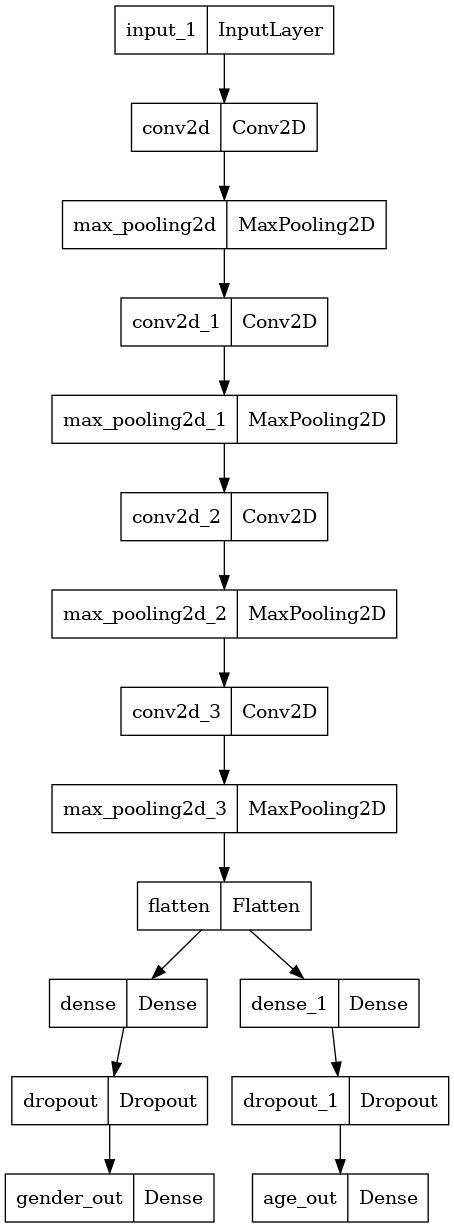

In [24]:
# Creating Input Layer:
inputs = Input((input_size)) # This line creates an Input layer for the model, which serves as the entry point for the input data. The Input((input_size)) parameter specifies the input shape, which matches the previously defined input_size.

# First Convolutional Block:
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs) # The line X = Conv2D(64, (3, 3), activation='relu', kernel_initializer=glorot_uniform(seed=0))(inputs) defines a 2D convolutional layer in a deep learning model and applies it to the input data. Let's break down each part of the code: X =: This part assigns the output of the convolutional layer to the variable X. This variable will hold the processed data after passing through the convolutional layer. Conv2D(64, (3, 3), activation='relu', kernel_initializer=glorot_uniform(seed=0)): This part creates a 2D convolutional layer with the following parameters: 64: This specifies the number of filters in the convolutional layer. Each filter learns to detect specific features in the input data. (3, 3): This specifies the kernel size, which is the dimensions of the filter matrix. A 3x3 kernel means the filter will scan the input data in a 3x3 window. activation='relu': This sets the activation function for the convolutional layer to ReLU (Rectified Linear Unit). ReLU introduces non-linearity into the network and helps to learn complex patterns in the data. kernel_initializer=glorot_uniform(seed=0): This sets the kernel initializer to Glorot uniform initialization, which is a method for initializing the weights of the filters in a way that promotes stable learning. The seed=0 parameter ensures consistent initialization across different runs. (inputs): This part applies the convolutional layer to the input data represented by the variable inputs. The output of the convolutional layer, which is a set of feature maps, is assigned to the variable X.
X = BatchNormalization(axis = 3)(X) # The line X = BatchNormalization(axis=3)(X) applies batch normalization to the output of the previous layer, which is represented by the variable X. Batch normalization is a technique used to stabilize the learning process in deep neural networks. Let's break down the code: X =: This part assigns the output of the batch normalization layer to the variable X, which will hold the normalized data. BatchNormalization(axis=3): This part creates a batch normalization layer with the parameter axis=3. The axis parameter specifies the axis along which to normalize the data. In this case, axis=3 corresponds to the channel dimension, as the input data is assumed to be in the format (batch_size, height, width, channels). (X): This part applies the batch normalization layer to the data represented by the variable X. The output of the batch normalization layer, which is the normalized data, is assigned back to the variable X.
X = MaxPooling2D((3, 3))(X) # max pooling helps us to return the important features out of all feature maps by reducing the width and height of the spatial dimension

'''The reason for repeating this pattern is to build a deeper network with multiple layers of feature extraction and downsampling.

Deeper networks are capable of learning more complex and abstract representations of the input data. By stacking convolutional and max pooling layers, the model can extract increasingly higher-level features from the images. The first convolutional layer might capture simple edges and textures, while subsequent layers can identify more complex patterns like facial features or object shapes.

Additionally, using multiple max pooling layers helps to gradually reduce the spatial dimensions of the feature maps, making the network more efficient and less sensitive to the exact location of features. This allows the model to focus on the overall structure and relationships between features, rather than being overly influenced by small details.

By repeating the convolutional and max pooling pattern, the model can extract a hierarchy of features from the input images, ranging from low-level details to high-level semantic information. This hierarchical representation is essential for tasks like image classification or object detection, where understanding the overall content of the image is crucial.'''

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X) # Flattening is a common step in deep learning models that involves converting a multidimensional array into a one-dimensional vector., The purpose of flattening is to prepare the data for the fully connected layers that typically follow the convolutional and pooling layers in a deep learning model. Fully connected layers expect a one-dimensional input vector, where each element corresponds to a single feature. By flattening the feature maps, we essentially combine all the extracted features into a single vector that can be processed by the fully connected layers.

dense_1 = Dense(256, activation='relu')(X) # dense_1 = Dense(256, activation='relu')(X): dense_1 =: This part assigns the output of the fully connected layer to the variable dense_1. Dense(256, activation='relu'): This part creates a fully connected layer with 256 units and the ReLU activation function. The 256 units represent the number of neurons in the layer. (X): This part applies the fully connected layer to the input data represented by the variable X.
dense_2 = Dense(256, activation='relu' )(X)
dense_3 = Dense(128, activation='relu' )(dense_2) # dense_3 = Dense(128, activation='relu')(dense_2): dense_3 =: This part assigns the output of the fully connected layer to the variable dense_3. Dense(128, activation='relu'): This part creates a fully connected layer with 128 units and the ReLU activation function. (dense_2): This part applies the fully connected layer to the output of the previous layer represented by the variable dense_2. These fully connected layers take the flattened feature vector as input and learn more abstract representations of the features. The first layer has 256 units, indicating a higher capacity for learning complex patterns. The second layer has 128 units, further refining the feature representations. The ReLU activation function introduces non-linearity into the network, allowing it to learn complex relationships between the features. ReLU sets all negative values to zero, making the network more efficient and less prone to vanishing gradients. These fully connected layers play a crucial role in the final stages of the deep learning model, combining and processing the extracted features to make predictions or classifications.
dropout_1 = Dropout(0.4)(dense_1) # The dropout rate of 0.4 means that during each training iteration, 40% of the units or neurons in the dense_1 and dense_3 layers will be randomly set to zero. This forces the network to distribute its learning across a wider range of units and prevents it from becoming overly reliant on any specific features. By applying dropout after the dense_1 and dense_3 layers, the model is less likely to overfit to the training data and generalizes better to unseen data. Dropout is a crucial technique for improving the generalization performance of deep neural networks.
dropout_2 = Dropout(0.4)(dense_3)
output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1) # Dense(1, activation='sigmoid', name='gender_output'): This part creates a dense layer with one unit, a sigmoid activation function, and the name gender_output. The single unit indicates that this layer is predicting a binary outcome (gender). (dropout_1): This part applies the dense layer to the output of the dropout layer represented by the variable dropout_1.
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2) # Dense(1, activation='relu', name='age_output'): This part creates a dense layer with one unit, a ReLU activation function, and the name age_output. The single unit indicates that this layer is predicting a continuous value (age). (dropout_2): This part applies the dense layer to the output of the dropout layer represented by the variable dropout_2.

model = Model(inputs=[inputs], outputs=[output_1,output_2]) # This part creates a Keras model object, specifying the input layer as inputs and the output layers as output_1 and output_2. The sigmoid activation function in output_1 is suitable for binary classification, as it squashes the output between 0 and 1, representing the probability of belonging to one class (e.g., male or female). The ReLU activation function in output_2 is appropriate for predicting a continuous value like age, as it allows for non-negative outputs. The model = Model(inputs=[inputs], outputs=[output_1, output_2]) line creates a Keras model with the specified input and output layers, effectively connecting all the layers defined in the previous lines. This model can then be compiled and trained using Keras methods.

### what is spatial dimension of feature maps how does it look like
In the context of convolutional neural networks (CNNs), feature maps are the outputs of convolutional layers. These feature maps represent the extracted features from the input data, such as edges, textures, or patterns. The spatial dimensions of feature maps refer to the height and width of these maps.

Imagine a feature map as a 2D matrix of values, where each value represents the activation of a particular feature detector at a specific location in the input image. The height and width of the feature map correspond to the spatial dimensions of the input image, but they may be reduced through downsampling operations like max pooling.

For instance, if the input image is 128x128 pixels, the initial feature maps might also have a spatial dimension of 128x128. However, after applying a max pooling layer with a 2x2 pool size, the spatial dimensions of the feature maps would be reduced to 64x64. This downsampling process helps to extract the most important features while reducing computational complexity.

In [25]:
model.compile(loss=['binary_crossentropy','mae'], optimizer='adam', metrics=['accuracy'])

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 126, 126, 64)         640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 126, 126, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 42, 42, 64)           0         ['batch_normalization[0][0

### Training the model

In [27]:
model_history=model.fit(x=x_train,y=[y_gender,y_age],batch_size=10,epochs=20,validation_split=0.1)

Epoch 1/20
320/320 [==============================] - 88s 266ms/step - loss: 16.7391 - gender_output_loss: 0.6940 - age_output_loss: 16.0451 - gender_output_accuracy: 0.6834 - age_output_accuracy: 0.0481 - val_loss: 23.7588 - val_gender_output_loss: 0.6213 - val_age_output_loss: 23.1375 - val_gender_output_accuracy: 0.6292 - val_age_output_accuracy: 0.0506
Epoch 2/20
320/320 [==============================] - 90s 280ms/step - loss: 12.6907 - gender_output_loss: 0.4627 - age_output_loss: 12.2280 - gender_output_accuracy: 0.7822 - age_output_accuracy: 0.0241 - val_loss: 16.2014 - val_gender_output_loss: 0.7209 - val_age_output_loss: 15.4804 - val_gender_output_accuracy: 0.5815 - val_age_output_accuracy: 0.0506
Epoch 3/20
320/320 [==============================] - 86s 269ms/step - loss: 11.0528 - gender_output_loss: 0.4005 - age_output_loss: 10.6523 - gender_output_accuracy: 0.8184 - age_output_accuracy: 0.0116 - val_loss: 17.7839 - val_gender_output_loss: 0.4267 - val_age_output_loss: 17

### Visualizing loss

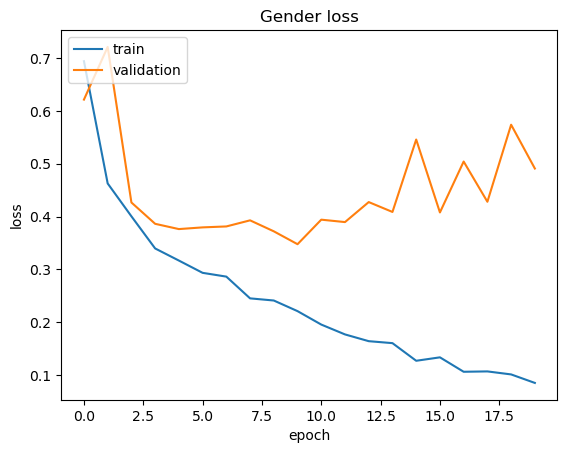

In [28]:
plt.plot(model_history.history['gender_output_loss'])
plt.plot(model_history.history['val_gender_output_loss'])
plt.title('Gender loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### what is here loss 
Loss is a measure of how far the model's predictions are from the ground truth values. A lower loss indicates that the model is making more accurate predictions.

In the context of the graph, the training loss and validation loss are measures of how well the model is predicting the target values on the training data and unseen data, respectively. A lower training loss indicates that the model is making more accurate predictions on the training data. A lower validation loss indicates that the model is making more accurate predictions on unseen data.

When the validation loss starts to increase, it means that the model is starting to overfit to the training data. This means that the model is learning the specific details of the training data too well, and is not able to generalize to new data.

We can use regularization techniques to reduce overfitting and improve the model's generalization performance. Regularization techniques force the model to learn more robust representations and prevent it from relying too heavily on specific features.

### Here are some specific ways to consider the loss:

**Compare the training loss to the validation loss.** If the training loss is much lower than the validation loss, it may indicate that the model is overfitting.

**Look at the trend of the loss over time.** If the loss is decreasing, it means that the model is learning and improving. If the loss is increasing, it may indicate that the model is overfitting or not learning effectively.

**Compare the loss of different models.** If two models have similar accuracy, you can compare their loss to determine which model is more efficient.

**Use the loss to track the progress of a model during training.** You can plot the loss over time to see how the model is learning. This can help you to identify overfitting or other problems early on.

Overall, the loss is an important metric to consider when evaluating the performance of a deep learning model. By understanding the loss, you can identify and address problems with your model, and improve its overall performance.

### Above Graph Explaination
- The graph shows how well the model is learning to predict the target values over time. The blue line shows the training loss, which is the average error of the model on the training data. The red line shows the validation loss, which is the average error of the model on unseen data.

- The training loss decreases over time, which means that the model is learning to predict the target values more accurately on the training data. However, the validation loss starts to increase after a certain point, which means that the model is not learning to predict the target values as accurately on unseen data.

- This suggests that the model is starting to overfit to the training data. Overfitting occurs when the model learns the specific details of the training data too well, and is not able to generalize to new data.

- To improve the model's ability to generalize, we can use regularization techniques such as dropout or early stopping. Dropout randomly removes some of the neurons in the model during training, which forces the model to learn more robust representations. Early stopping involves stopping the training process early, before the model has a chance to overfit to the training data.

- Overall, the graph shows that the model is learning to predict the target values more accurately on the training data over time. However, the model is starting to overfit to the training data, which means that it is not learning to generalize to unseen data as well. We can use regularization techniques to improve the model's generalization performance.

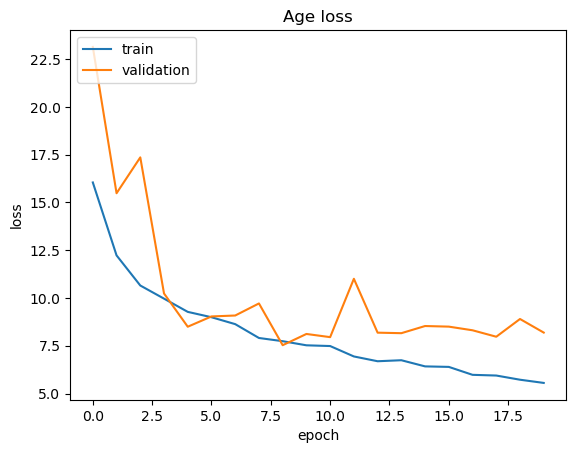

In [29]:
plt.plot(model_history.history['age_output_loss'])
plt.plot(model_history.history['val_age_output_loss'])
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Train curve** - Over the training time of model(epoch) the loss is getting decrease ,it is a good sign which means that our model does training well on the training data 

**validation curve**- Over the training time of model(epoch) in the starting stage the loss is getting decrease but after some time the loss is getting increase over a period of time ,which it is not a good sign which means that our model does not able to predict on the unseen data 

#### IMP
The training loss starts at a relatively high value and gradually decreases over the epochs, indicating that the model is learning from the training data and improving its ability to predict the target values. The validation loss also decreases initially, but it starts to plateau and then slightly increase after around epoch 10. This suggests that the model is starting to overfit to the training data and is not generalizing as well to unseen data.

### Predicting test image

Original: Gender =  Female  Age =  32.0
1/1 [==============================] - 0s 179ms/step
Prediction: Gender =  Female  Age =  34


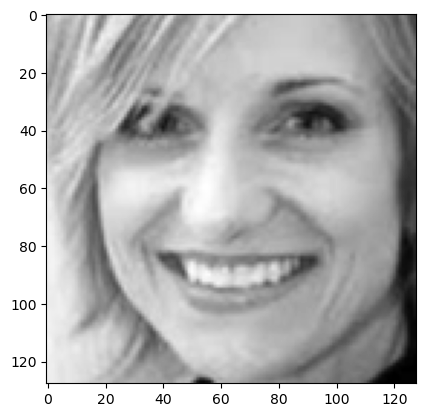

In [30]:
index=45
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1)) # This line uses the model.predict() function to predict the gender and age of the person from the corresponding image. The reshape() function is used to reshape the image into a 4D tensor, which is the expected input format for the model. The x_train[index] variable contains the image of the person at index index in the training data. The 128, 128, 1 parameters specify the height, width, and number of channels of the input image.
pred_gender = gender_dict[round(pred[0][0][0])] 
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')

According to the loss, the model is overfitting. I should have add some more regularization in the model to prevent overfitting but it is taking a lot of time. With 5k images, it takes 2.5 hours to fit on the train set. I stopped here but you can try adding regularization techniques to prevent overfitting.

In [31]:
index=20
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])] # The indexing operator [] is used to access elements of a tensor in Python. A tensor is a multi-dimensional array, and each element of a tensor can be accessed using its corresponding indices. In the code snippet you provided, the pred variable is a 4D tensor, which means that it has four dimensions: height, width, channel, and batch size.
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)

Original: Gender =  Female  Age =  35.0
1/1 [==============================] - 0s 31ms/step
Prediction: Gender =  Female  Age =  35
